In [14]:
%autosave 0
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

Autosave disabled


In [4]:
data = pd.read_csv("monthly-sunspots.csv", index_col=0)
data.head(5)

,Sunspots
Month,
1749-01,58.0
1749-02,62.6
1749-03,70.0
1749-04,55.7
1749-05,85.0


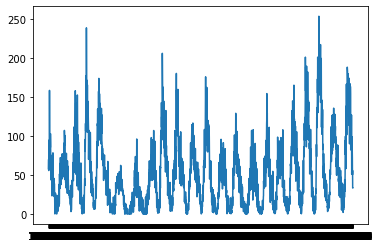

In [7]:
plt.plot(data['Sunspots']);

In [28]:
rfft = np.fft.rfft(data['Sunspots'])
rfft

array([144570.            +0.j        ,  17030.48739206 +6162.59152599j,
        15853.15411304+11580.00547463j, ...,
          421.82075049  +747.5247642j ,    549.44920618   -33.26882114j,
         -740.6           +0.j        ])

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


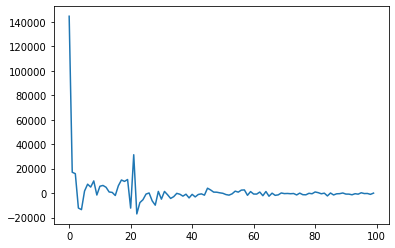

In [33]:
plt.plot(rfft[0:100]);

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


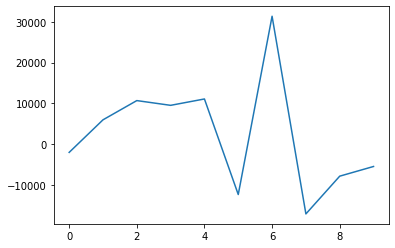

In [30]:
plt.plot(rfft[15:25]);

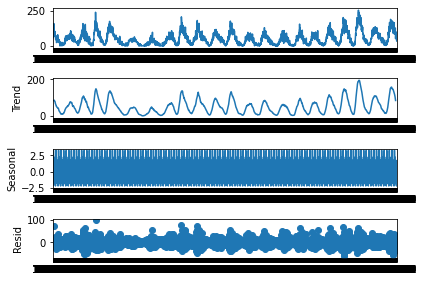

In [31]:
result = seasonal_decompose(data, model='additive', period = 21)
result.plot();

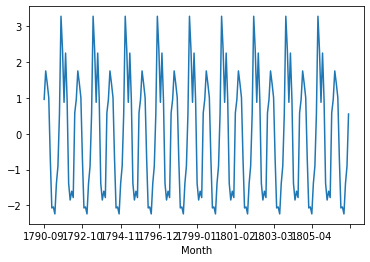

In [36]:
result.seasonal[500:700].plot();

### Analyse de la stationnarité

In [10]:
from statsmodels.tsa.stattools import adfuller

In [19]:
adfuller(data.iloc[10:-10, 0])

(0.672475354530809,
 0.989272253511597,
 13,
 110,
 {'1%': -3.4912451337340342,
  '5%': -2.8881954545454547,
  '10%': -2.5809876033057852},
 835.0856857284203)

In [20]:
adfuller(result.resid[10:-10])

(-5.6954737254309595,
 7.892549248752597e-07,
 9,
 114,
 {'1%': -3.489057523907491,
  '5%': -2.887246327182993,
  '10%': -2.5804808802708528},
 -490.8459414227988)